## Homework 10

### Your task now is to construct a neural network (in Keras) that learns clasification on this data set. Try to optimize and regularize it with the methods you have learned in class and by going thrugh this notebook. What is the best validation dataset score you can achieve?

Here's what you should take away from this example:

- If you are trying to classify data points between N classes, your network should end with a Dense layer of size N.
- In a single-label, multi-class classification problem, your network should end with a softmax activation, so that it will output a probability distribution over the N output classes.
- Categorical crossentropy is almost always the loss function you should use for such problems. It minimizes the distance between the probability distributions output by the network, and the true distribution of the targets.
- There are two ways to handle labels in multi-class classification: Encoding the labels via "categorical encoding" (also known as "one-hot encoding") and using categorical_crossentropy as your loss function. Encoding the labels as integers and using the sparse_categorical_crossentropy loss function.
- If you need to classify data into a large number of categories, then you should avoid creating information bottlenecks in your network by having intermediate layers that are too small.

#### author: Maria Lewandowska
#### date: 20.05.2019

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['figure.figsize']=12,10

import numpy as np
import random

import keras
from keras import models
from keras import layers
#from keras import losses
#from keras import metrics
#from keras.utils import to_categorical

import warnings
warnings.filterwarnings('ignore')

np.random.seed(21)

%matplotlib inline

Using TensorFlow backend.


In [2]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

print('lenght of the training data', len(train_data))
print('lenght of the testing data', len(test_data))

lenght of the training data 8982
lenght of the testing data 2246


The label associated with an example is an integer between 0 and 45: a topic index.

In [3]:
number_of_labels = len(np.unique(train_labels))
np.unique(train_labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

## Preparing the data

We can vectorize the data with the exact same code as in our previous example:

In [4]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# Our vectorized training and testing data
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

number_of_features = len(x_test[1])

In [5]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

# Our vectorized training and testing labels
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [6]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

## Network implementation

In [7]:
network = models.Sequential()
network.add(layers.Dense(units = 100, activation = 'relu', input_shape = (number_of_features,) ))
network.add(layers.Dense(units = 100, activation = 'relu'))

network.add(layers.Dense(units = number_of_labels, activation = 'softmax'))


Instructions for updating:
Colocations handled automatically by placer.


In [8]:
network.compile(loss = 'categorical_crossentropy',
               optimizer='rmsprop',
               metrics = ['accuracy'])

In [9]:
history = network.fit(x_train,
                      one_hot_train_labels,
                      epochs=10,
                      verbose =1,
                      batch_size = 100,
                      validation_data = (x_test, one_hot_test_labels)                      
                     )

Instructions for updating:
Use tf.cast instead.
Train on 8982 samples, validate on 2246 samples
Epoch 1/10
8982/8982 [==============================] - 3s 384us/step - loss: 1.5302 - acc: 0.6747 - val_loss: 1.1289 - val_acc: 0.7453
Epoch 2/10
8982/8982 [==============================] - 2s 275us/step - loss: 0.7565 - acc: 0.8314 - val_loss: 0.9335 - val_acc: 0.7921
Epoch 3/10
8982/8982 [==============================] - 2s 272us/step - loss: 0.4629 - acc: 0.9007 - val_loss: 0.9267 - val_acc: 0.8001
Epoch 4/10
8982/8982 [==============================] - 2s 267us/step - loss: 0.3241 - acc: 0.9284 - val_loss: 0.9166 - val_acc: 0.8090
Epoch 5/10
8982/8982 [==============================] - 2s 257us/step - loss: 0.2461 - acc: 0.9428 - val_loss: 1.0343 - val_acc: 0.7974
Epoch 6/10
8982/8982 [==============================] - 2s 277us/step - loss: 0.2088 - acc: 0.9462 - val_loss: 1.0706 - val_acc: 0.7979
Epoch 7/10
8982/8982 [==============================] - 2s 262us/step - loss: 0.1868 - a

## Model Visualisation

In [10]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

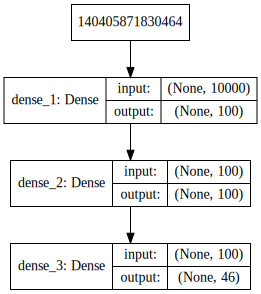

In [11]:
plot_model(network, show_shapes=True, to_file='network.png')
SVG(model_to_dot(network, show_shapes = True).create(prog = 'dot', format = 'svg') )

## Results

<function matplotlib.pyplot.show(*args, **kw)>

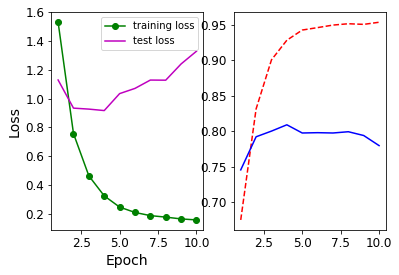

In [33]:
training_loss = history.history['loss']
test_loss =  history.history['val_loss']
trainig_accuracy = history.history['acc']
test_accuracy = history.history['val_acc']

epoch_count = range(1, len(training_loss)+1)


plt.figure(figsize=(7, 4))


plt.plot(epoch_count, training_loss, 'g-o')
plt.plot(epoch_count, test_loss, 'm-')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['training loss', 'test loss'])

plt.subplot(122)

plt.plot(epoch_count, trainig_accuracy, 'g-o')
plt.plot(epoch_count, test_accuracy, 'm-')


plt.show
